# [실습] seaborn 다이아몬드 데이터셋에 대한 EDA

- 탐색적 데이터 분석 (Exploratory Data Analysis, EDA)
  - 데이터를 분석하고 결과를 내는 과정에 있어서 지속적으로 해당 데이터에 대한 '탐색과 이해'를 기본으로 가져야 한다는 것을 의미함.
- 데이터 준비
  - import seaborn as sns
  - dia = sns.load_dataset('diamonds')
- dia 데이터 프레임에 대한 EDA를 진행해 주세요
  - 그래프 3가지 이상 시각화
  - '고찰' 의견 정리

In [1]:
import pandas as pd
import seaborn as sns

dia = sns.load_dataset('diamonds')

In [2]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## df.info()
- 열(컬럼) 별 자료형 확인
  - 범주형데이터 3개(cut, color, clarity) 있고, 나머지는 수치형 데이터 임
- 데이터 개수 확인

In [3]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [11]:
print(dia.select_dtypes(include=['int64']).columns)
print(dia.select_dtypes(include=['float64']).columns)
print(dia.select_dtypes(include=['object', 'category']).columns)

Index(['price'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


- int64 : ['price']
- float64 : ['carat', 'depth', 'table', 'x', 'y', 'z']
- category : ['cut', 'color', 'clarity']

In [13]:
num_dia = dia.select_dtypes(include=['int64', 'float64'])
str_dia = dia.select_dtypes(include=['object', 'category'])

In [14]:
num_dia.head(2)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31


In [17]:
num_dia.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
str_dia.head(2)

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1


In [19]:
str_dia.describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [21]:
print('cut : ', str_dia['cut'].unique())          # ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
print('color : ', str_dia['color'].unique())      # ['E', 'I', 'J', 'H', 'F', 'G', 'D']
print('clarity : ', str_dia['clarity'].unique())  # ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

cut :  ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color :  ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity :  ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


## df.isnull().sum()
- 결측치 확인
  - 결측치는 없음

In [7]:
dia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 상관관계 확인

### 수치형 컬럼

### 수치형 전체 데이터의 상관관계(pairplot)

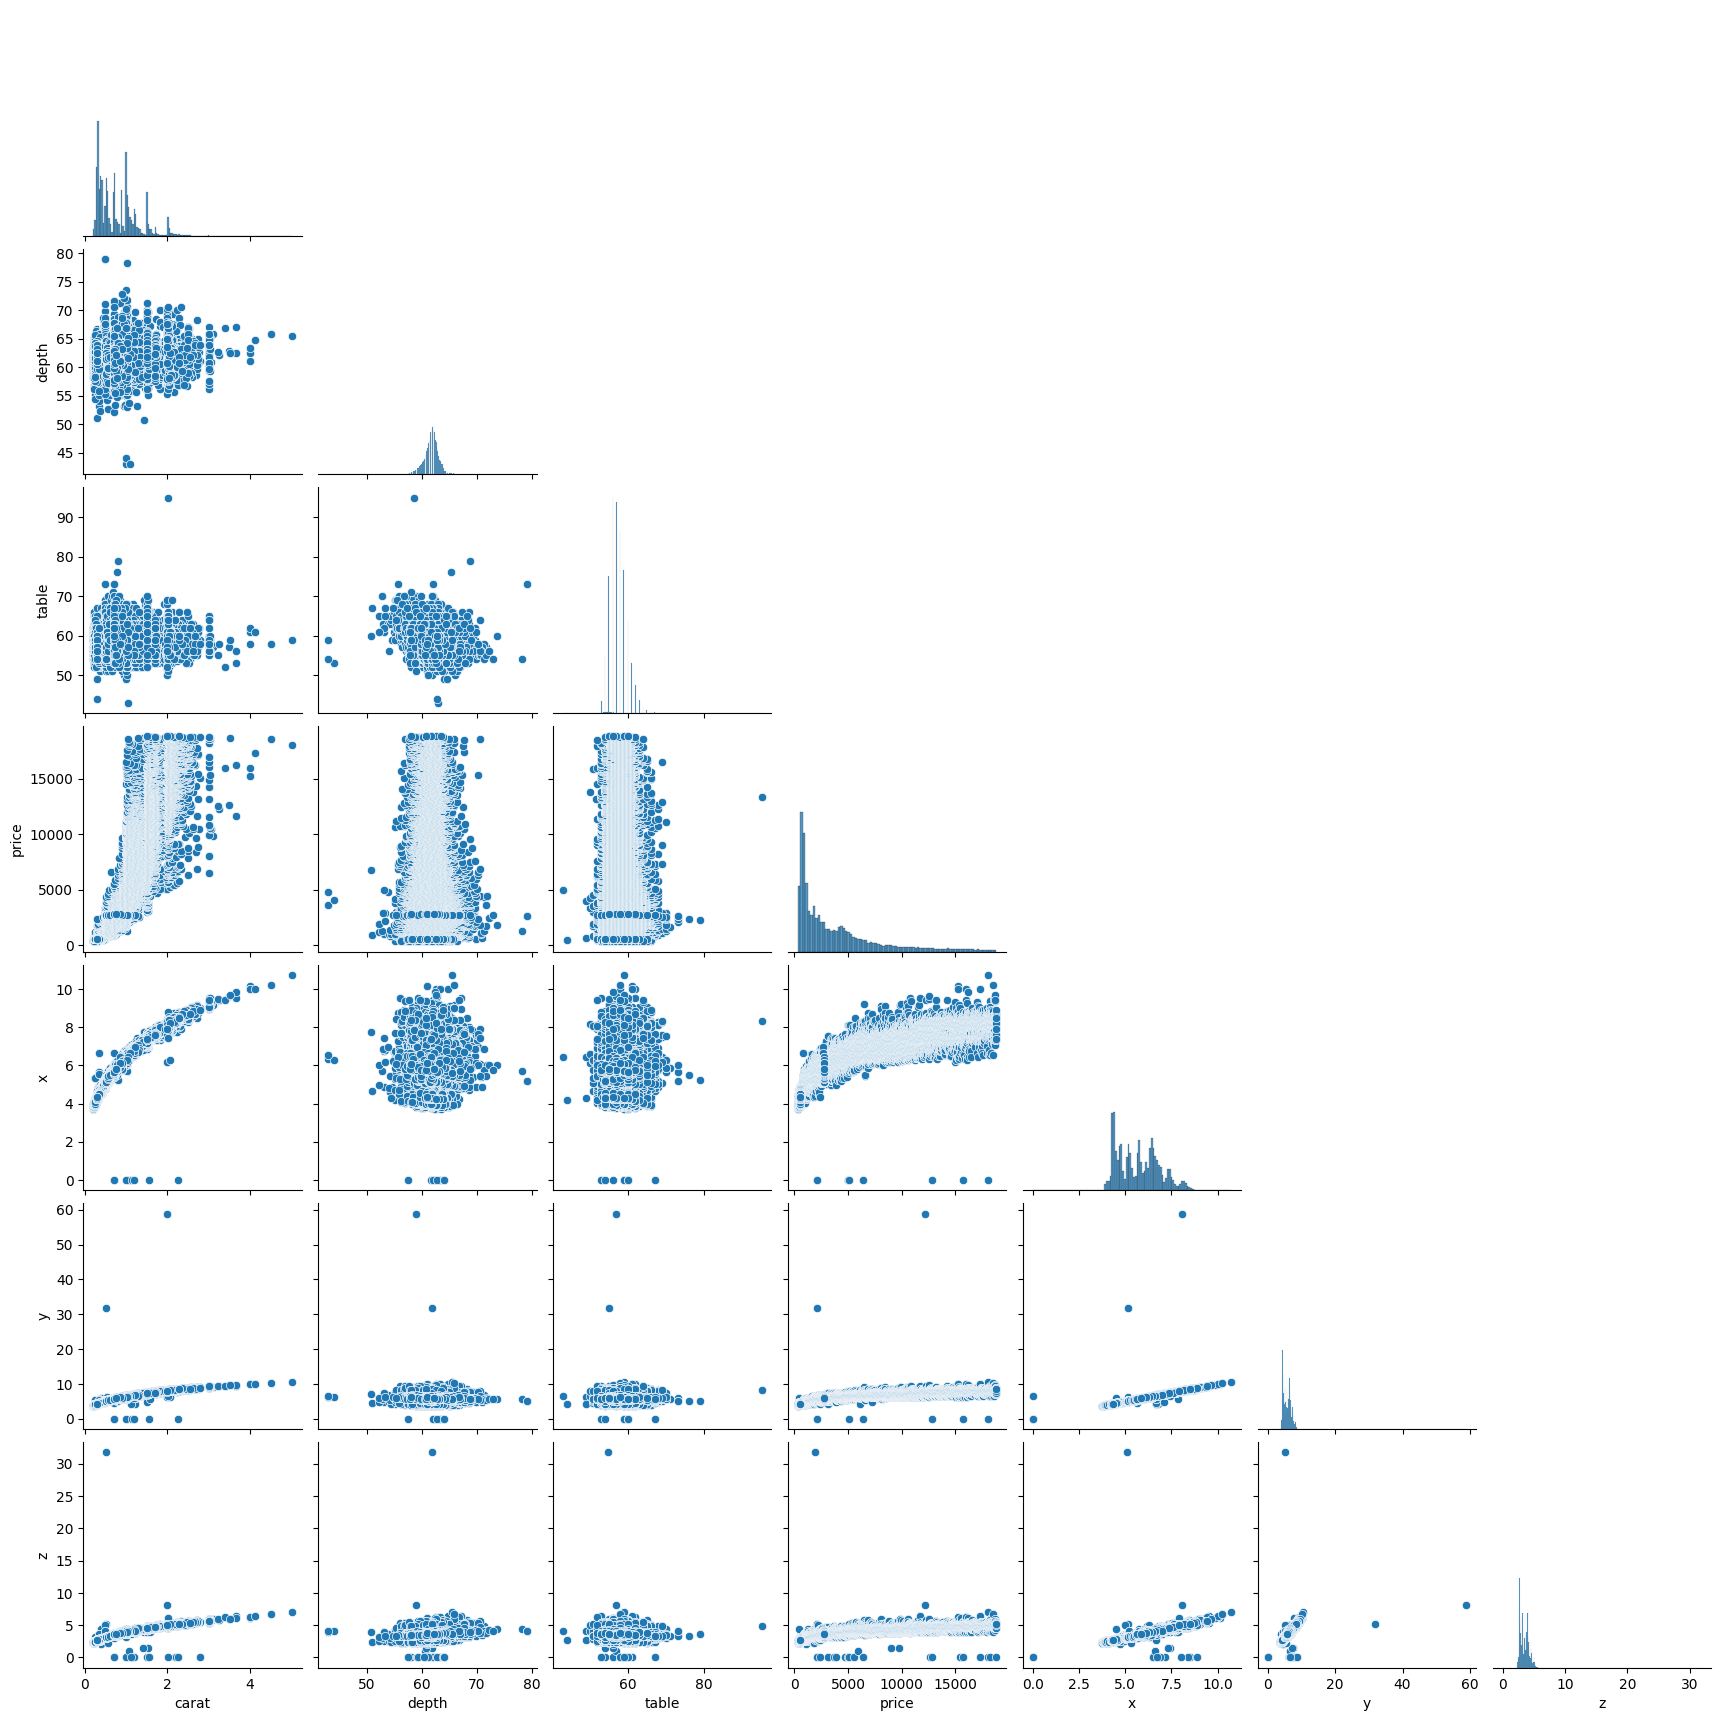

In [22]:
sns.pairplot(num_dia, corner = True)

### 수치형 전체 데이터의 상관관계(heatmap)

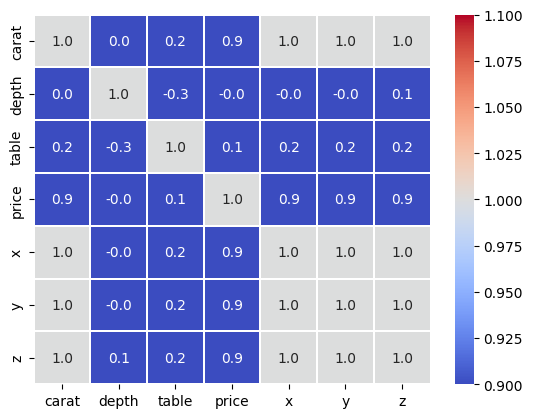

In [23]:
corr = num_dia.corr()                        # 상관행렬표 만들기
sns.heatmap(round(corr, 1),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = 1.0,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

- "carat", "x", "y", "z" 컬럼은 종속 변수인 price(가격)과 높은 상관관계가 있습니다.

#### 이상값 확인

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "Line Plot on Price vs 'x'")

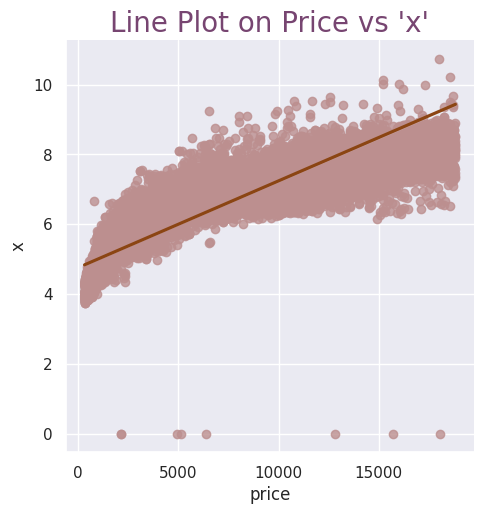

In [39]:
lm = sns.lmplot(x="price", y="x", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'x'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'y'")

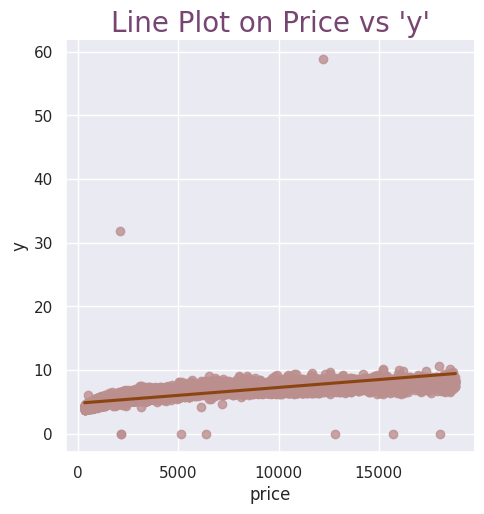

In [40]:
lm = sns.lmplot(x="price", y="y", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'z'")

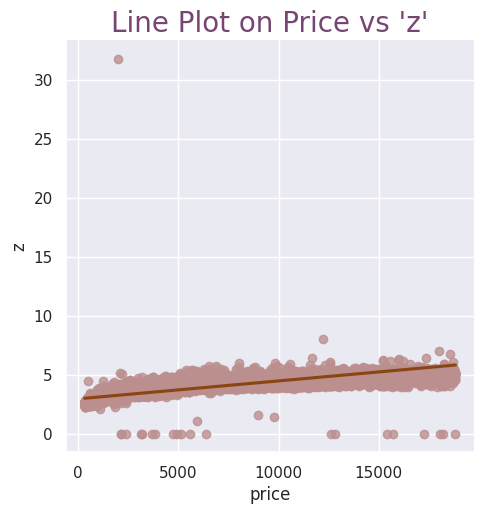

In [41]:
lm = sns.lmplot(x="price", y="z", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'depth'")

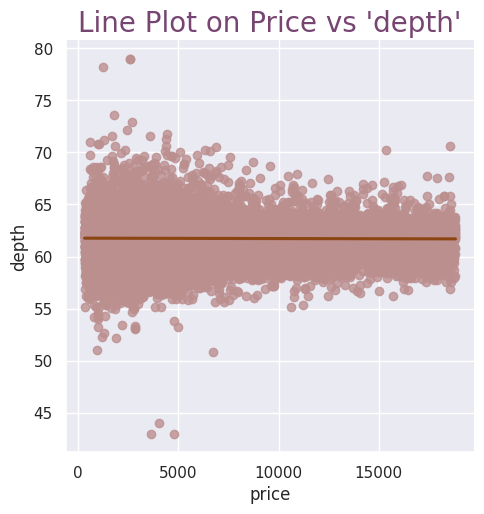

In [42]:
lm = sns.lmplot(x="price", y="depth", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'Table'")

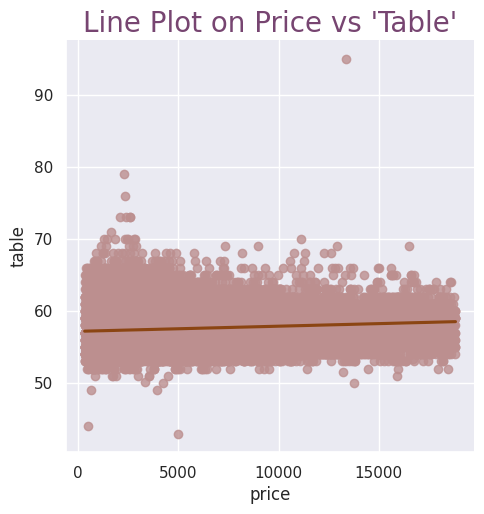

In [43]:
lm = sns.lmplot(x="price", y="table", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)